In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import torch
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset

In [2]:
x_train = pd.read_parquet('/content/drive/MyDrive/Project/American Express Default/Dataset/x_train_baseline.parquet')
x_test = pd.read_parquet('/content/drive/MyDrive/Project/American Express Default/Dataset/x_test_baseline.parquet')
y_train = pd.read_csv('/content/drive/MyDrive/Project/American Express Default/Dataset/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Project/American Express Default/Dataset/y_test.csv')

In [3]:
y_test1 = y_test["target"]
y_train1 = y_train["target"]

Helper function for confusion matrix

In [4]:
### Helper method
# You may consider changeing the colour scheme in practice

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
# empty dataframe for storing performance matrics
metrics = pd.DataFrame(np.zeros(shape = (5, 4)))
metrics.columns = ['models', 'accuracy', 'f1 score', 'precision']

In [6]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 22.6 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.3 MB/s eta 0:00:00


In [ ]:
pip install pytorch_tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 961.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 whi

In [ ]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1) Random Forest Baseline

--------RF--------
Training time: 323.59 seconds
Correctly classified instances: 117161
Accuracy Score is 0.851
Recall Score is 0.67193
Precision Score is 0.73092
F1 Score is 0.70019
       0      1
0  93208   8818
1  11695  23953
[[93208  8818]
 [11695 23953]]


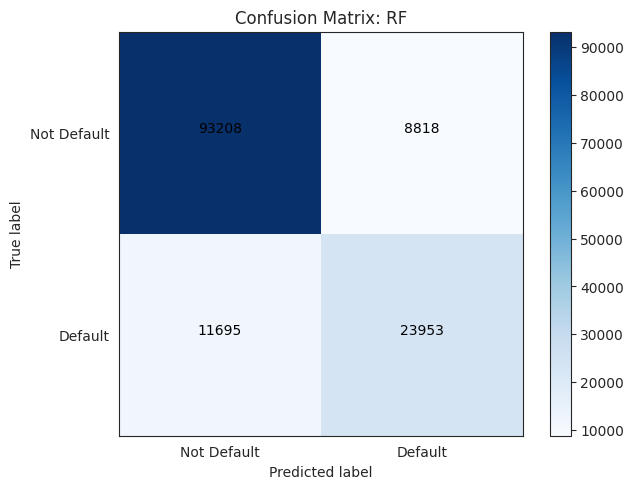

In [7]:
print("--------RF--------")
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
start_time = time.time()
rf_model.fit(x_train, y_train1)
# end tracking the training time and print the result
end_time = time.time()

y_predict =rf_model.predict(x_test)
#print(y_predict)
#print(y_test_label)

print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_predict == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test1,y_predict)))

sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: RF')

metrics.iloc[0,:] = ['RF',accuracy_score(y_test1, y_predict),
                     f1_score(y_test1, y_predict),
                     precision_score(y_test1,y_predict)]

ROC Score for Random Forest

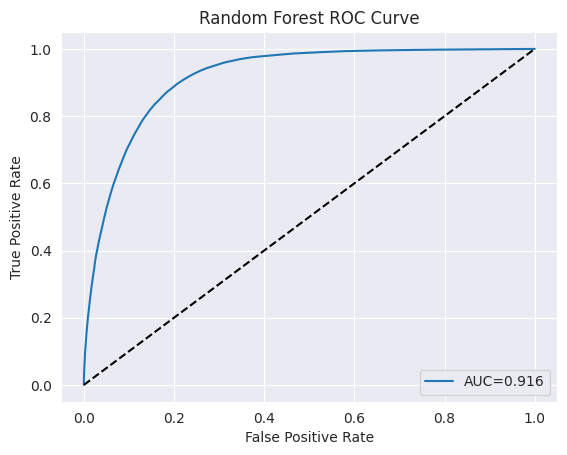

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# assume you have a trained classifier clf and test data X_test, y_test
y_score = rf_model.predict_proba(x_test)[:, 1] # get the probability of positive class
fpr, tpr, _ = roc_curve(y_test1, y_score) # calculate FPR, TPR
roc_auc = auc(fpr, tpr) # calculate AUC

# plot ROC curve using Seaborn
sns.set_style('darkgrid')
sns.lineplot(x=fpr, y=tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance for the Random Forest

    Feature  Importance
99      B_9    0.092012
83     B_10    0.067549
88      R_1    0.052312
104    D_47    0.038915
55     B_19    0.030407
117     R_3    0.026861
122    D_60    0.024160
60     B_12    0.023924
79      S_5    0.023691
87      B_5    0.023485


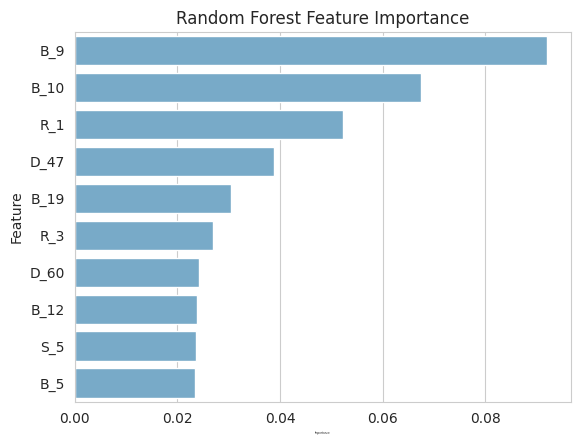

In [ ]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = rf_model.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply plot for the Random Forest

Permutation explainer: 201it [02:29,  1.34it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


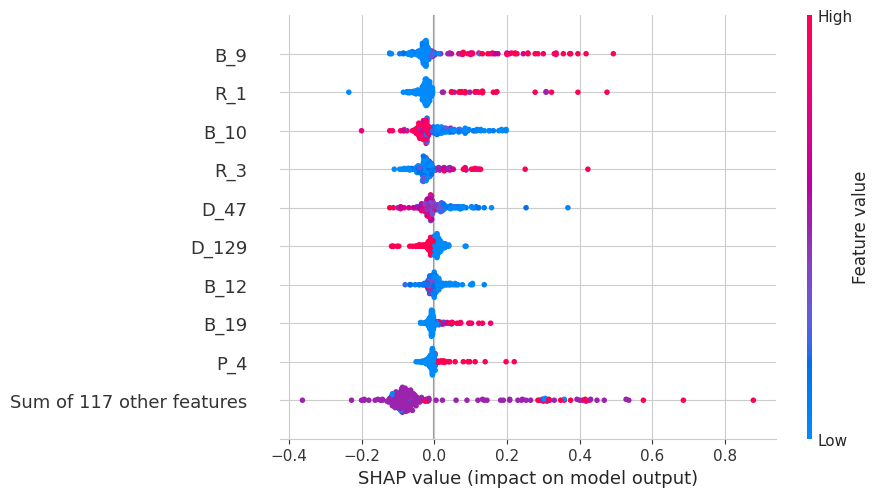

In [ ]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(rf_model.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

## 2) LGBM

In [ ]:
x_train.head(n = 5)

,B_30_0,B_30_1,B_30_2,B_38_1,B_38_2,B_38_3,B_38_4,B_38_5,B_38_6,B_38_7,...,R_17,R_3,Year,S_13,S_12,R_10,D_60,D_124,R_23,R_26
0,1,0,0,0,0,1,0,0,0,0,...,0,0,2017,290,0.192535,0,0.190317,5,0,-1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,2017,0,0.190811,0,0.005039,3,0,-1
2,1,0,0,0,0,1,0,0,0,0,...,0,2,2017,0,0.191670,0,0.606294,2,0,-1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,2018,290,0.189667,0,0.214078,6,0,-1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,2017,872,0.356928,0,0.982222,9,0,-1


--------LGBM--------


Using categorical_feature in Dataset.


Training time: 15.906 seconds
Correctly classified instances: 117786
Accuracy Score is 0.85554
Recall Score is 0.70203
Precision Score is 0.72979
F1 Score is 0.71564
       0      1
0  92760   9266
1  10622  25026
[[92760  9266]
 [10622 25026]]


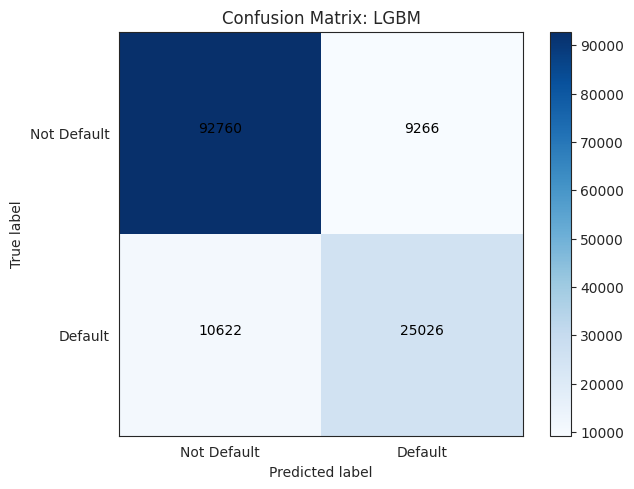

In [ ]:
print("--------LGBM--------")
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier(random_state = 42)
cat_features = list(range(0, 50))
start_time = time.time()
lgbm_model.fit(x_train, y_train1,categorical_feature=cat_features)

# end tracking the training time and print the result
end_time = time.time()

y_predict = lgbm_model.predict(x_test)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_predict == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test1,y_predict)))

sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: LGBM')

metrics.iloc[0,:] = ['LGBM',accuracy_score(y_test1, y_predict),
                     f1_score(y_test1, y_predict),
                     precision_score(y_test1,y_predict)]

ROC Score for LGBM

Seaborn implementation is quite slow, we will use matplotlib instead.

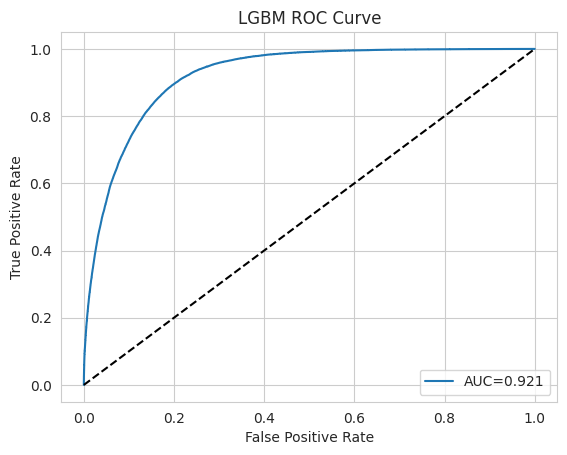

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = lgbm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test1, y_score)
roc_auc = auc(fpr, tpr)

# set the style of the plot
plt.style.use('ggplot')

plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance for LGBM

    Feature  Importance
83     B_10         221
104    D_47         194
99      B_9         173
117     R_3         156
122    D_60          90
69     D_59          87
65     D_39          78
88      R_1          71
79      S_5          69
93      P_4          68


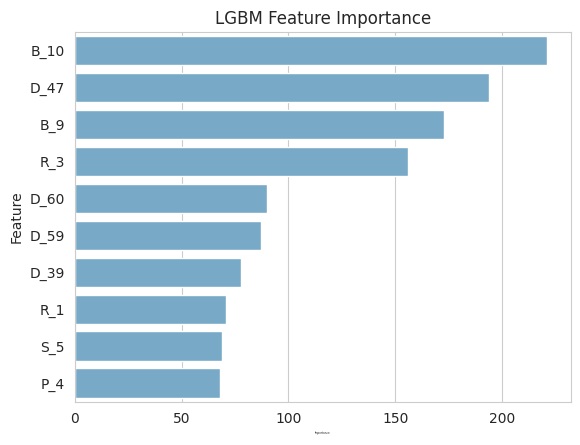

In [ ]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = lgbm_model.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('LGBM Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply Plot for LGBM

Permutation explainer: 201it [01:04,  2.77it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


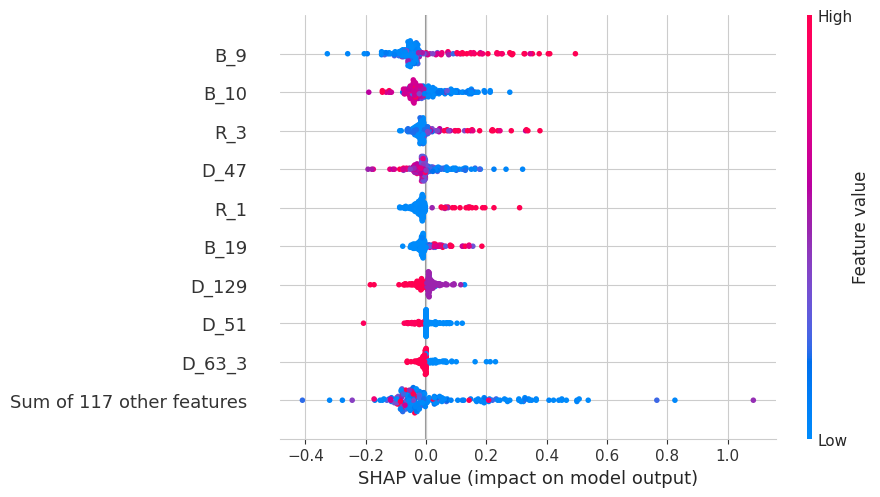

In [ ]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(lgbm_model.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

## 3) XGBOOST

--------XGBoost--------
Training time: 460.8 seconds
Correctly classified instances: 117789
Accuracy Score is 0.85556
Recall Score is 0.69878
Precision Score is 0.73142
F1 Score is 0.71473
       0      1
0  92879   9147
1  10738  24910
[[92879  9147]
 [10738 24910]]


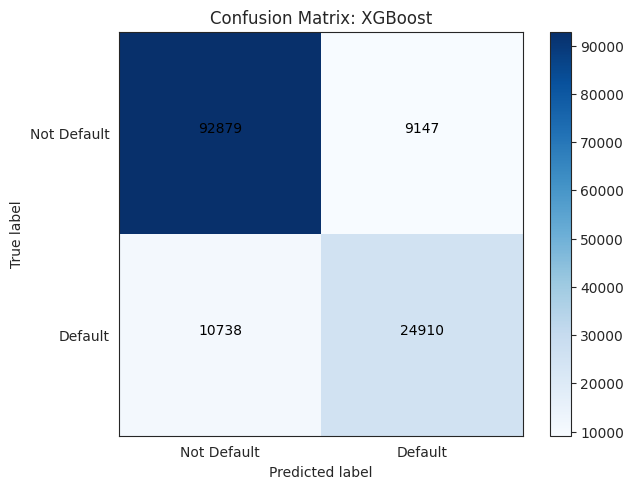

In [ ]:
from xgboost import XGBClassifier
print("--------XGBoost--------")
xgb = XGBClassifier(booster = 'gbtree', seed = 42)
start_time = time.time()
xgb.fit(x_train, y_train1)
# end tracking the training time and print the result
end_time = time.time()

y_predict = xgb.predict(x_test)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_predict == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test1,y_predict)))

sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: XGBoost')

ROC Curve for XGBOOST

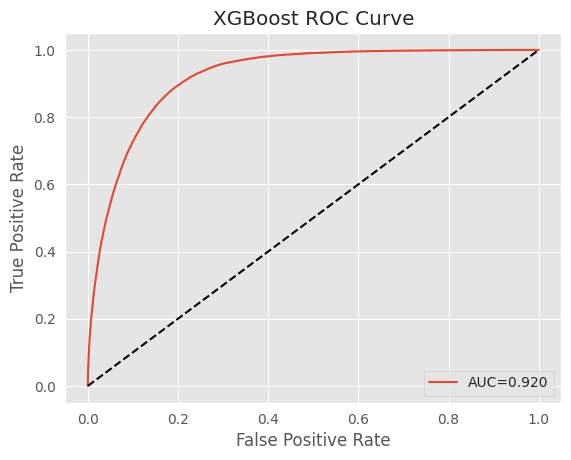

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# assume you have a trained classifier clf and test data X_test, y_test
y_score = xgb.predict_proba(x_test)[:, 1] # get the probability of positive class
fpr, tpr, _ = roc_curve(y_test1, y_score) # calculate FPR, TPR
roc_auc = auc(fpr, tpr) # calculate AUC

# set the style of the plot
plt.style.use('ggplot')

# plot ROC curve using matplotlib
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance for XGBoost

     Feature  Importance
99       B_9    0.087075
74      D_51    0.067230
83      B_10    0.055900
93       P_4    0.047775
97     D_127    0.042933
12   D_114_1    0.030506
37    D_64_0    0.028391
110    D_129    0.028094
105     B_22    0.027482
117      R_3    0.026621


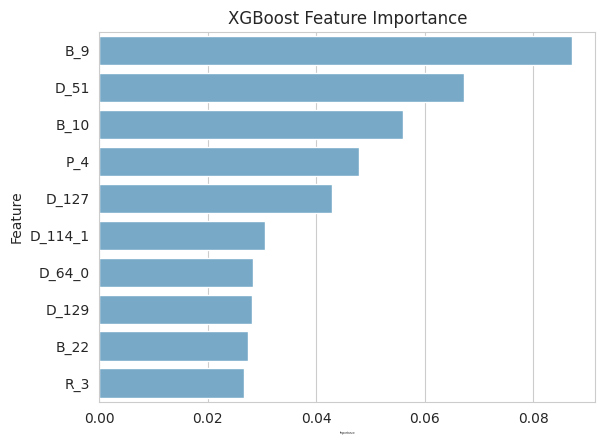

In [ ]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = xgb.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply plot for XGBoost

Permutation explainer: 201it [00:31,  4.34it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


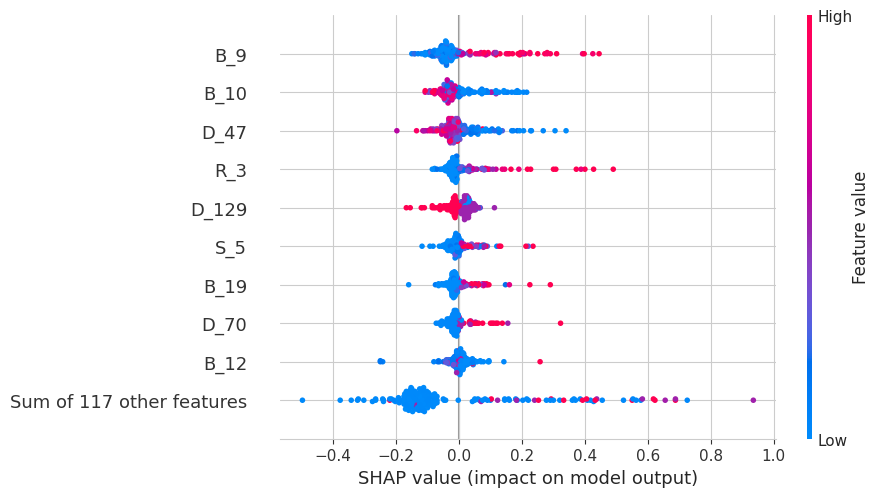

In [ ]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(xgb.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

## 4) Catboost

--------CatBoost--------
Training time: 152.38 seconds
Correctly classified instances: 118051
Accuracy Score is 0.85747
Recall Score is 0.70444
Precision Score is 0.73429
F1 Score is 0.71906
       0      1
0  92939   9087
1  10536  25112
[[92939  9087]
 [10536 25112]]


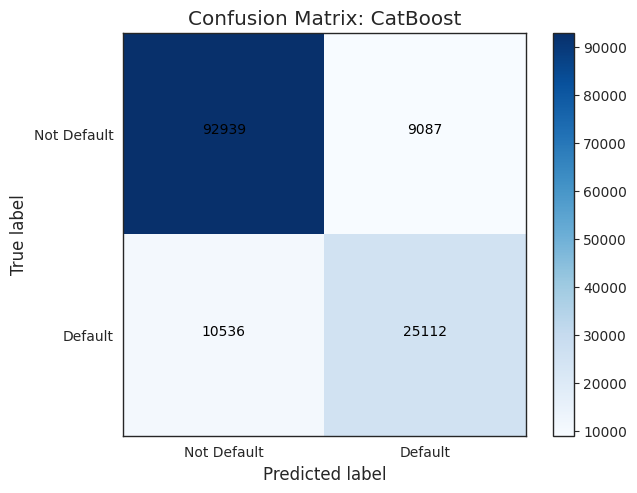

In [ ]:
from catboost import CatBoostClassifier
print("--------CatBoost--------")
cat = CatBoostClassifier(random_seed=42, verbose=False)
start_time = time.time()
cat.fit(x_train, y_train1)
# end tracking the training time and print the result
end_time = time.time()

y_predict = cat.predict(x_test)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_predict == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test1,y_predict)))

sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: CatBoost')

Roc curve

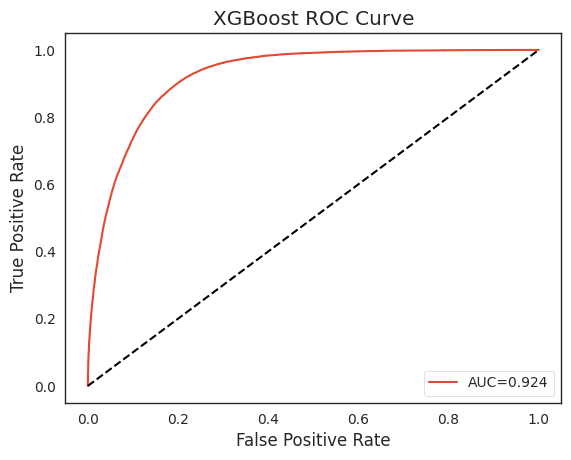

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# assume you have a trained classifier clf and test data X_test, y_test
y_score = cat.predict_proba(x_test)[:, 1] # get the probability of positive class
fpr, tpr, _ = roc_curve(y_test1, y_score) # calculate FPR, TPR
roc_auc = auc(fpr, tpr) # calculate AUC

# plot ROC curve using matplotlib
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance

    Feature  Importance
83     B_10   14.774738
99      B_9   10.421824
104    D_47    7.233949
117     R_3    4.765361
93      P_4    4.025116
88      R_1    3.654760
74     D_51    3.387895
55     B_19    2.244372
125    R_26    2.079156
110   D_129    2.059022


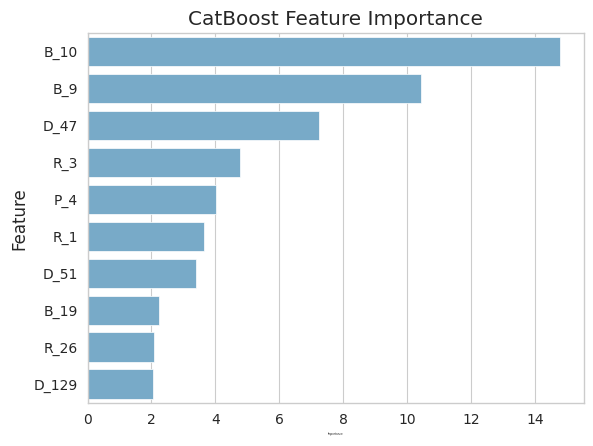

In [ ]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = cat.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply plot for Catboost

Permutation explainer: 201it [00:33,  4.25it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


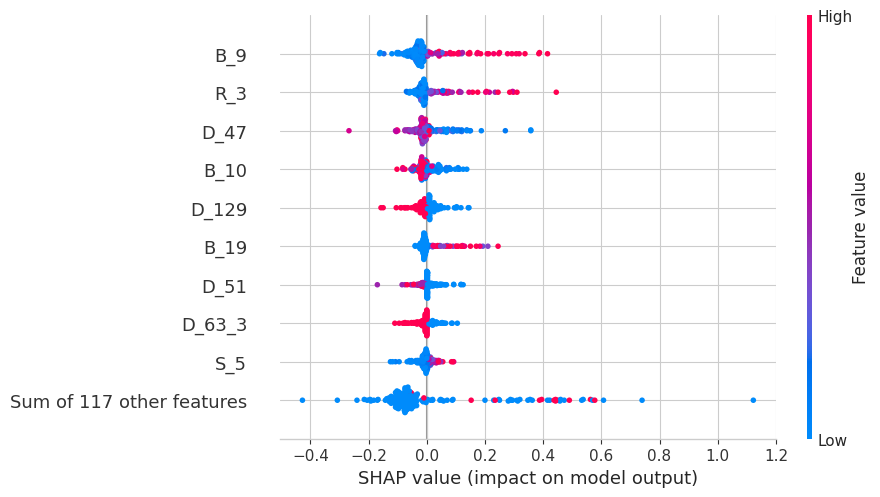

In [ ]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(cat.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

## 5) Tabnet

In [ ]:
!pip install torch --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━

In [ ]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.


In [ ]:
pip install --pre torch torchvision --extra-index-url https://download.pytorch.org/whl/nightly/cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/nightly/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-tabnet 4.0 requires torch<2.0,>=1.2, but you have torch 2.0.0 which is incompatible.


In [ ]:
x_train_np = np.array(x_train)
y_train_np = np.array(y_train1)
x_test_np = np.array(x_test)
y_test_np = np.array(y_test1)

In [ ]:
# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# define the model
tabnet = TabNetClassifier()

# train the model
start_time = time.time()
tabnet.fit(
    X_train=x_train_np,
    y_train=y_train_np,
    eval_set=[(x_test_np, y_test_np)],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    eval_metric=['accuracy'],
    from_unsupervised=None,
)
end_time = time.time()

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.41683 | val_0_accuracy: 0.73395 |  0:00:16s
epoch 1  | loss: 0.3384  | val_0_accuracy: 0.81698 |  0:00:32s
epoch 2  | loss: 0.32684 | val_0_accuracy: 0.84261 |  0:00:48s
epoch 3  | loss: 0.32241 | val_0_accuracy: 0.84643 |  0:01:04s
epoch 4  | loss: 0.32059 | val_0_accuracy: 0.8425  |  0:01:20s
epoch 5  | loss: 0.31907 | val_0_accuracy: 0.84749 |  0:01:36s
epoch 6  | loss: 0.31766 | val_0_accuracy: 0.84778 |  0:01:52s
epoch 7  | loss: 0.31608 | val_0_accuracy: 0.84115 |  0:02:09s
epoch 8  | loss: 0.31496 | val_0_accuracy: 0.84567 |  0:02:25s
epoch 9  | loss: 0.31466 | val_0_accuracy: 0.85169 |  0:02:41s
epoch 10 | loss: 0.31362 | val_0_accuracy: 0.85201 |  0:02:57s
epoch 11 | loss: 0.31343 | val_0_accuracy: 0.85113 |  0:03:13s
epoch 12 | loss: 0.31296 | val_0_accuracy: 0.84911 |  0:03:29s
epoch 13 | loss: 0.31854 | val_0_accuracy: 0.83329 |  0:03:45s
epoch 14 | loss: 0.31509 | val_0_accuracy: 0.84696 |  0:04:01s
epoch 15 | loss: 0.31662 | val_0_accuracy: 0.85065 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


--------Tabnet--------
Correctly classified instances: 117436
Accuracy Score is 0.853
Recall Score is 0.66929
Precision Score is 0.73849
F1 Score is 0.70219
       0      1
0  93577   8449
1  11789  23859
[[93577  8449]
 [11789 23859]]


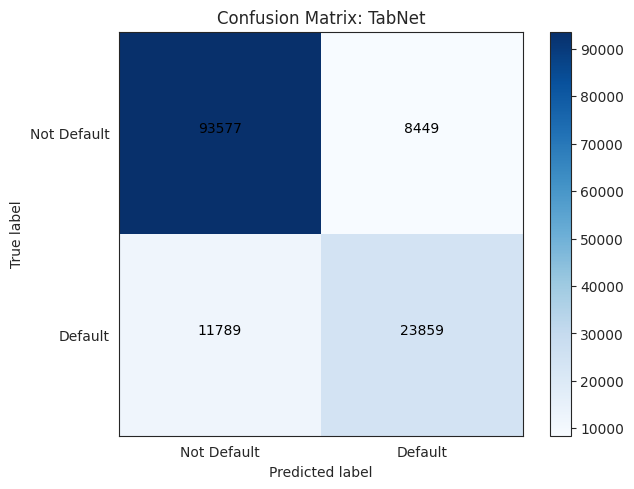

In [ ]:
# make predictions on test set
y_pred = tabnet.predict(x_test_np)
print("--------Tabnet--------")

# print evaluation metrics
print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_pred == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_pred)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_pred)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_pred)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_pred)))
print(pd.DataFrame(confusion_matrix(y_test1, y_pred)))

# plot confusion matrix
sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_pred),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: TabNet')

Roc Score

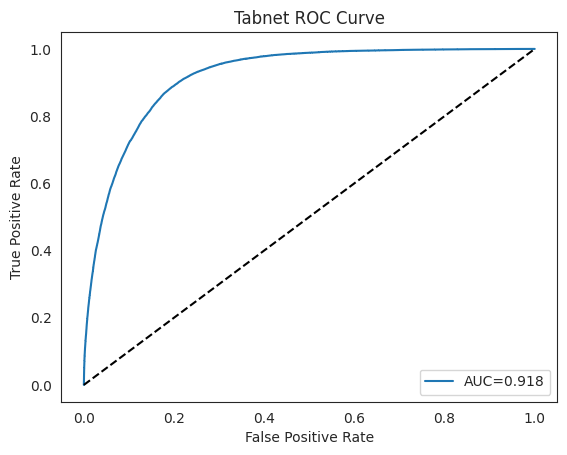

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# assume you have a trained classifier clf and test data X_test, y_test
y_score = tabnet.predict_proba(x_test_np)[:, 1] # get the probability of positive class
fpr, tpr, _ = roc_curve(y_test_np, y_score) # calculate FPR, TPR
roc_auc = auc(fpr, tpr) # calculate AUC

# plot ROC curve using matplotlib
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tabnet ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance for Tabnet

     Feature  Importance
87       B_5    0.655591
28   D_126_0    0.151415
31    D_63_0    0.074715
66      S_19    0.041618
83      B_10    0.038389
51      D_91    0.020749
74      D_51    0.009992
104     D_47    0.006452
29   D_126_1    0.001031
69      D_59    0.000015


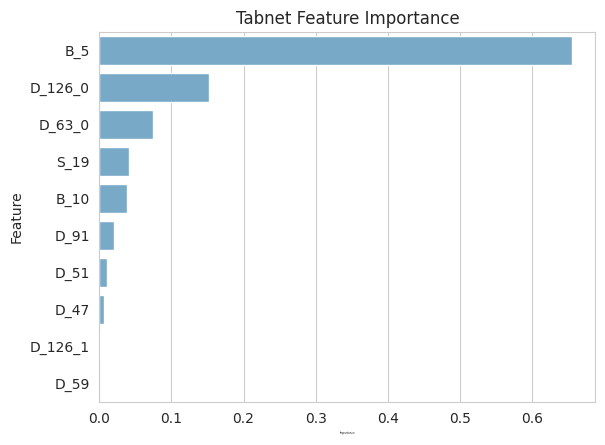

In [ ]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = tabnet.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('Tabnet Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply Plot for Tabnet

Permutation explainer: 201it [01:52,  1.62it/s]


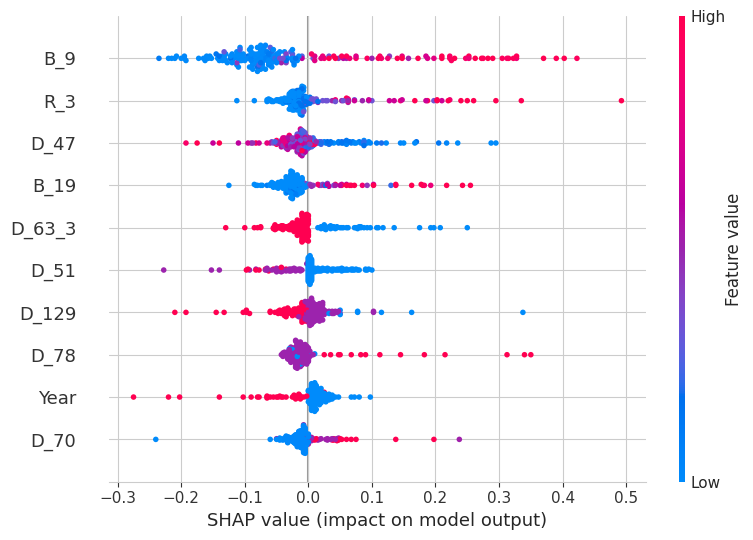

In [ ]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test_np.shape[0], size=200, replace=False)
x_test_sample = x_test_np[sample_indices]

explainer = shap.Explainer(tabnet.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.summary_plot(sv, feature_names=x_train.columns, max_display=10)